In [2]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
from matplotlib.lines import Line2D
import math

sys.path.append(str(Path("..").resolve()))
from src import *

# DCT vs FFT

In [ ]:
editor = Editor()
editor.compose(
    [
        {
            "DeepCAD": "best/y.mp4",
            "GroundTruth": "best/gt.mp4",
        },
        {
            "DCT": "best/dct_fused_frame3000_win6000_s036_δs72_t0-6_δt16.mp4",
            "FFT": "best/ftt_fused_frame3000_alphas0.85.mp4",
        },
    ],
    "dct_vs_fft.mp4",
    bitrate=1500,
    duration=60,
    speed=1,
    zoom=2.75,
)

### 🎥 See [`dct_vs_fft.mp4`](dct_vs_fft.mp4)

## PSNR3D vs SSIM3D

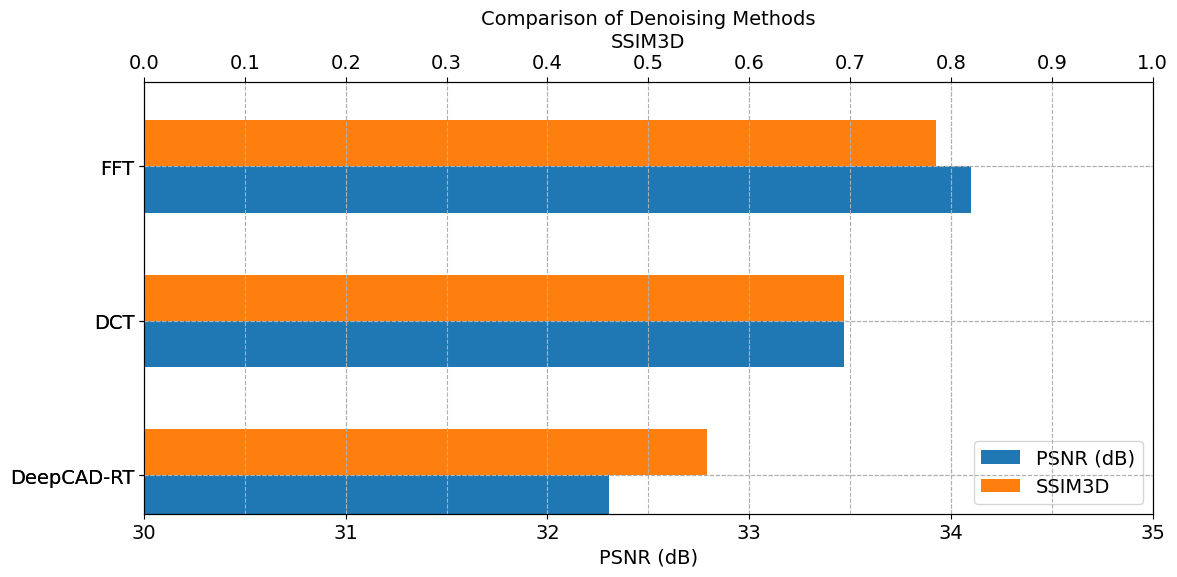

In [14]:
# DCT is frame3000_win6000_s036_δs72_t0
# FFT is frame3000_alphas0.85
df = pd.DataFrame(
    {
        "PSNR (dB)": {"DeepCAD-RT": 32.3038, "DCT": 33.47127, "FFT": 34.09738},
        "SSIM3D": {"DeepCAD-RT": 0.5577, "DCT": 0.694209, "FFT": 0.78490},
    }
)
fig, ax1 = plt.subplots(figsize=(12, 6))

# plot PSNR
df["PSNR (dB)"].plot(kind="barh", ax=ax1, color="tab:blue", position=1, width=0.3, label="PSNR (dB)")
ax1.set_xlim(30, 35)
ax1.set_xticks(range(30, 36, 1))
ax1.set_xlabel("PSNR (dB)")

ax2 = ax1.twiny()
df["SSIM3D"].plot(kind="barh", ax=ax2, color="tab:orange", position=0, width=0.3, label="SSIM3D")
ax2.set_xlim(0, 1)
ax2.set_xticks([_/10 for _ in range(0, 11)])
ax2.set_xlabel("SSIM3D")

ax1.set_yticks(range(len(df)))
ax1.set_yticklabels(df.index)
ax1.set_title("Comparison of Denoising Methods")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="lower right")

plt.tight_layout()
plt.show()